In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f = r.TFile("./data/results_1MissingFile_FullVsTrunc.root")
f.ls()

TFile**		./data/results_1MissingFile_FullVsTrunc.root	
 TFile*		./data/results_1MissingFile_FullVsTrunc.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [3]:
fileString = "1MissingFile"
print("Creating files with:", fileString, "suffix")

Creating files with: 1MissingFile suffix


In [4]:
f.cd("clustersAndCoincidences")
f.ls()

TFile**		./data/results_1MissingFile_FullVsTrunc.root	
 TFile*		./data/results_1MissingFile_FullVsTrunc.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFi

In [8]:
triples = f.Get("clustersAndCoincidences").Get("backwardsTriples").Clone()

In [6]:
triplesTrunc = f.Get("clustersAndCoincidencesTrunc").Get("triples").Clone()
triplesTrunc.SetLineColor(2)

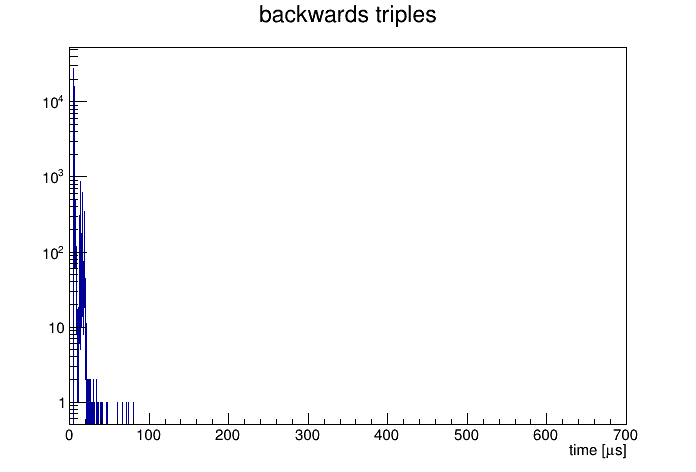

In [9]:
c = r.TCanvas()
triples.ProjectionX().Draw()
c.SetLogy()
c.Draw()

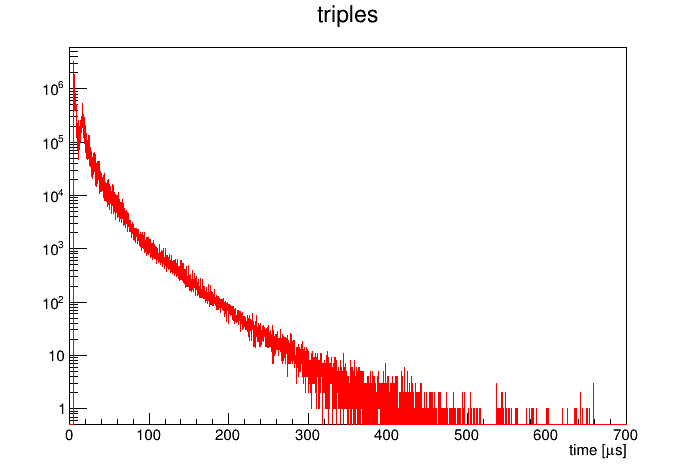

In [8]:
c = r.TCanvas()
triples.ProjectionX().Draw()
triplesTrunc.ProjectionX().Draw("SAME")
c.SetLogy()
c.Draw()

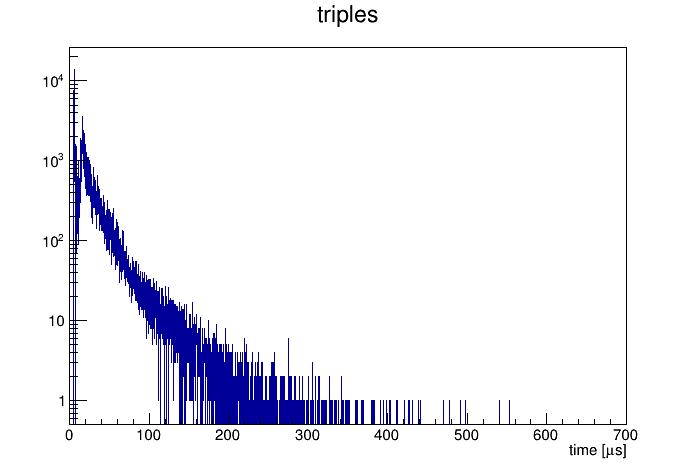

In [9]:
c = r.TCanvas()
triplesDiff = triples.ProjectionX().Clone()
triplesDiff.Add( triplesTrunc.ProjectionX(), -1)
triplesDiff.Draw()
c.SetLogy()
c.Draw()

In [11]:
tau = 64.40738559492887
triplesX = triples.ProjectionX().Clone()

for i in range(1,triplesX.GetNbinsX()):
    binCenter = triplesX.GetBinCenter(i)
    triplesX.SetBinContent(i, triplesX.GetBinContent(i)*r.TMath.Exp(binCenter / tau))

In [12]:
KlossInt = triples.ProjectionX().Clone("KlossInt")
KlossInt.SetTitle(str(tau))

for i in range(1,KlossInt.GetNbinsX()+1):
    inti = triplesX.Integral(1,i)
    KlossInt.SetBinContent(i, inti)

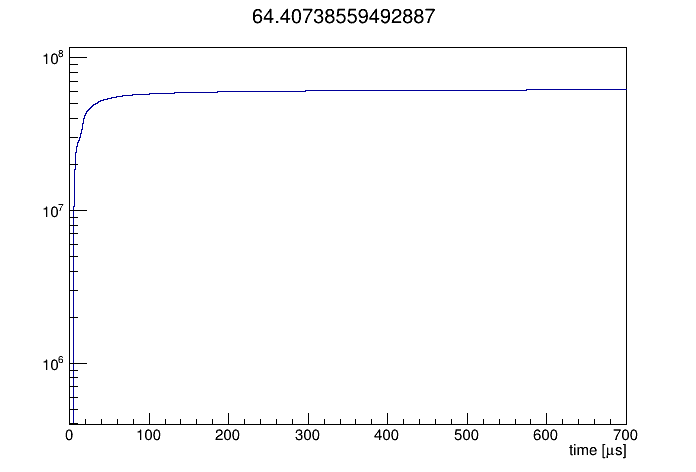

In [13]:
c = r.TCanvas()
KlossInt.Draw()
c.SetLogy()
c.Draw()

In [14]:
c.Print("Kloss/kloss_"+fileString+"_firstTry.root")

Info in <TCanvas::SaveAs>: ROOT file Kloss/kloss_1MissingFile_firstTry.root has been created


---

### And now the truncated version

In [15]:
tauTrunc = 64.42295941973906 
triplesXTrunc = triplesTrunc.ProjectionX().Clone()

for i in range(1,triplesXTrunc.GetNbinsX()):
    binCenter = triplesXTrunc.GetBinCenter(i)
    triplesXTrunc.SetBinContent(i, triplesXTrunc.GetBinContent(i)*r.TMath.Exp(binCenter / tau))

In [16]:
KlossIntTrunc = triplesXTrunc.Clone("KlossIntTrunc")
KlossIntTrunc.SetTitle(str(tauTrunc))

for i in range(1,KlossIntTrunc.GetNbinsX()+1):
    inti = triplesXTrunc.Integral(1,i)
    KlossIntTrunc.SetBinContent(i, inti)

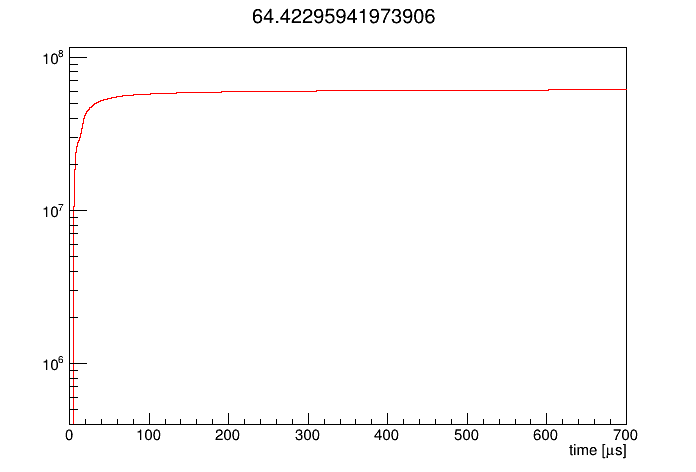

In [17]:
c = r.TCanvas()
KlossIntTrunc.Draw()
c.SetLogy()
c.Draw()

In [18]:
c.Print("Kloss/kloss_"+fileString+"_firstTry.root")

Info in <TCanvas::SaveAs>: ROOT file Kloss/kloss_1MissingFile_firstTry.root has been created
